<a href="https://colab.research.google.com/github/FerryJulyo/PCVK_Genap_2021/blob/main/UAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Acessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

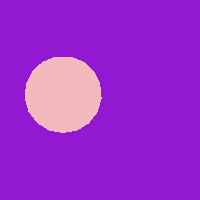

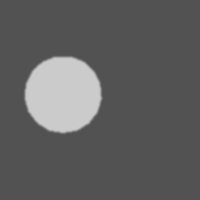

In [20]:
# Mengambil image :
img = cv2.imread('/content/drive/MyDrive/PCVK_MM/Circle_0b20242a-2a89-11ea-8123-8363a7ec19e6.png')
cv2_imshow(img)

# Mengconvert image ke Grayscale
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menambahkan Gaussian Blur(5,5)
blurred = cv2.GaussianBlur(imgGrey, (5,5), 0)


cv2_imshow(blurred)

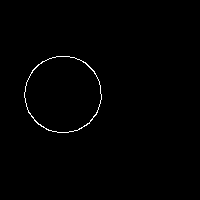

In [21]:
# Menentukan garis tepi dengan Canny Edge
edged = cv2.Canny(blurred, 30, 150)
cv2_imshow(edged)

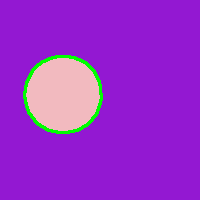

In [25]:
# Mencari Kontur dari hasil canny edge dan mengaplikasikannya ke image asli
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(img, cnts, -1, (0, 255, 0), 2)
cv2_imshow(draw)

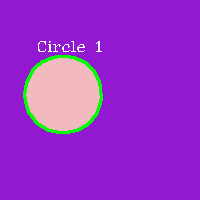

There are 0 Triangle, 0 Square, 0 Rectangle, 0 Pentagon, 1 circle in this image with total of 1 shape


In [ ]:
#initialise the shape count
triangle = 0
square = 0
rectangle = 0
pentagon = 0
circle = 0

for cnts in cnts:
    approx = cv2.approxPolyDP(cnts, 0.02* cv2.arcLength(cnts, True), True)
    draw2 = cv2.drawContours(img.copy(), cnts, -1, (255,255,255), 2)
    #cv2_imshow(draw2)
    
    x = approx.ravel()[0] #just x-coordinate to put text later
    y = approx.ravel()[1] - 5 #just y-coordinate to put text later
    if len(approx) == 3: # 3 sudut
        triangle += 1 # menghitung jumlah segitiga
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Triangle {}".format(triangle), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 4:

        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05: # ratio of w and h
            square += 1 #counting square
            print("square {} has {} Width and {} height".format(square, w, h)) #show w and h
            # put text near the shape:
            # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
            cv2.putText(img, "Square {}".format(square), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
          
        else:
            rectangle += 1 #counting rectangle
            print("rectangle {} has {} Width and {} height".format(rectangle, w, h)) #show w and h
            # put text near the shape:
            # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
            cv2.putText(img, "Rectangle {}".format(rectangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
   
    elif len(approx) == 5: #5 vertices
        pentagon += 1 #counting pentagon
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Pentagon {}".format(pentagon), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 6:  #special case for this image 
        triangle += 1 
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Triangle {}".format(triangle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    else: #others vertices will consider as circle
        circle +=1 #counting circle
        # put text near the shape:
        # cv2.putText(image, text, coordinates to start texting, font, font-size, color)
        cv2.putText(img, "Circle {}".format(circle), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

total = triangle + square + rectangle + pentagon + circle  #sum up all counted shape 

cv2_imshow(img)
print("There are {} Triangle, {} Square, {} Rectangle, {} Pentagon, {} circle in this image with total of {} shape".format(triangle,square,rectangle,pentagon,circle,total))

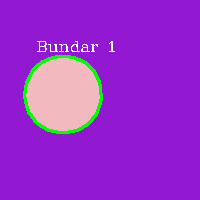

Jumlah bangun yang ada 0 segitiga, 0 kotak, 0 persegi, 0 segi lima, 0 segi enam, 0 segi tujuh, 1 bundar pada gambar ini dengan total 1 bangun bentuk


In [26]:
# Inisiasi bangun bentuk yang ada
segitiga = 0
kotak = 0
persegi = 0
segiLima = 0
segiEnam = 0
segiTujuh = 0
bulat = 0

for cnts in cnts:
    approx = cv2.approxPolyDP(cnts, 0.02* cv2.arcLength(cnts, True), True)
    draw2 = cv2.drawContours(img.copy(), cnts, -1, (255,255,255), 2)
    
    x = approx.ravel()[0] # kordinat x untuk menempatkan text
    y = approx.ravel()[1] - 5 # kordinat y untuk menempatkan text
    if len(approx) == 3: # 3 sudut(Segitiga)
        segitiga += 1 # menghitung jumlah segitiga
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segitiga {}".format(segitiga), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 4:

        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >= 0.95 and aspectRatio <= 1.05: # ratio tinggi dan lebar
            kotak += 1 # menghitung jumlah kotak
            print("Kotak {} mempunyai {} Lebar dan {} Tinggi".format(kotak, w, h)) # tampilkan tinggi dan lebar
            # Masukkan text disekitar bangun bentuk
            # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
            cv2.putText(img, "Kotak {}".format(kotak), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
          
        else:
            persegi += 1 # menghitung jumlah persegi
            print("Persegi {} mempunyai {} Lebar dan {} Tinggi".format(persegi, w, h)) # tampilkan tinggi dan lebar
            # Masukkan text disekitar bangun bentuk
            # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
            cv2.putText(img, "Persegi {}".format(persegi), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
   
    elif len(approx) == 5: #5 sudut(Segi lima)
        segiLima += 1 # menghitung jumlah segiLima
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Lima {}".format(segiLima), (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    elif len(approx) == 6:  # 6 sudut(Segi enam)
        segiEnam += 1 # Hitung jumlah Segi enam
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Enam {}".format(segiEnam), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

    elif len(approx) == 7:  # 7 sudut(Segi tujuh)
        segiTujuh += 1 # Hitung jumlah segi tujuh
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Segi Tujuh {}".format(segiTujuh), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))
        
    else: # Lainnya akan dianggap sebagai bundar
        bulat +=1 # menghitung jumlah bundar
        # Masukkan text disekitar bangun bentuk
        # cv2.putText(source, text, kordinat text ditulis, jenis font, ukuran font, warna)
        cv2.putText(img, "Bundar {}".format(bulat), (x - 20, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255))

total = segitiga + kotak + persegi + segiLima + segiEnam + segiTujuh + bulat  # hitung seluruh jumlah bangun bentuk

cv2_imshow(img)
print("Jumlah bangun yang ada {} segitiga, {} kotak, {} persegi, {} segi lima, {} segi enam, {} segi tujuh, {} bundar pada gambar ini dengan total {} bangun bentuk".format(segitiga,kotak,persegi,segiLima,segiEnam,segiTujuh,bulat,total))